# 1. Build Contact Network

This notebook contains the workflow for the first milestone in the Manning liveProject *Build Network Models for Pandemics.* *Build Network Models for Pandemics* is part of the series *Federated Learning Over Networks for Pandemics*.

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from geopy.distance import geodesic

## Read data

In [2]:
csvpath = "../../data/" # path to csv file

In [3]:
# import location data and show sample rows
df = pd.read_csv(csvpath + "PeopleLocations_p2.csv", delimiter=";")
df.sample(5)

,ID,Lat,Lon,Date,Time,Covid19
231,Person232,60.309191,25.036473,09-06-2021,13:52:09,y
214,Person215,60.309190,25.036464,09-06-2021,13:52:09,y
88,Person89,60.185387,25.009682,09-06-2021,13:52:09,n
173,Person174,60.168533,24.930488,09-06-2021,13:52:09,n
17,Person18,60.185390,25.009695,09-06-2021,13:52:09,n


## Create graph and nodes

In [4]:
G = nx.Graph()

In [5]:
for idx, person in df.iterrows():
    # format the coordinates
    coord = np.array((person["Lat"],person["Lon"]))
    
    # convert and combine the date and time
    date = datetime.strptime(person["Date"], "%d-%m-%Y").date()
    time = datetime.strptime(person["Time"], "%H:%M:%S").time()
    date_time = datetime.combine(date,time)
    
    # convert y and n into integers
    if person["Covid19"]=="y":
        rate = 1
    else:
        rate = 0
    
    # add node and create attributes
    G.add_node(idx)
    G.nodes[idx]["name"] = person["ID"]
    G.nodes[idx]["coords"] = coord
    G.nodes[idx]["timestamp"] = date_time
    G.nodes[idx]["Rate"] = rate

## Create edges

In [6]:
for i in G.nodes:
    for j in G.nodes:
        if G.nodes[i] != G.nodes[j]:
            distance = geodesic(G.nodes[i]["coords"], G.nodes[j]["coords"]).m # .m gets the distance from coordinates in meters
            if distance < 2:
                G.add_edge(i,j)

<function matplotlib.pyplot.show(close=None, block=None)>

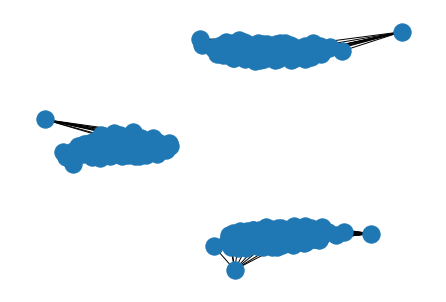

In [7]:
# this isn't really part of this milestone
# I'm showing the plots just to see if I do have nodes and edges
nx.draw(G)
plt.show